In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

C:\Users\penthotal\Desktop\git_repositories\bayesian_ANN


In [3]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import StratifiedShuffleSplit

from modules.neural_networks import BayesianAutoencoder
from modules.viz_utils import visualize_embedding

import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
X, y = load_digits(return_X_y=True)

for tr_i, ts_i in StratifiedShuffleSplit(n_splits=1).split(X, y):
    
    X_tr, X_ts = X[tr_i], X[ts_i]
    y_tr, y_ts = y[tr_i], y[ts_i]

    scaler = MinMaxScaler()
    scaler.fit(X_tr)

    X_tr = scaler.transform(X_tr)
    X_ts = scaler.transform(X_ts)

C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\pymc3\data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


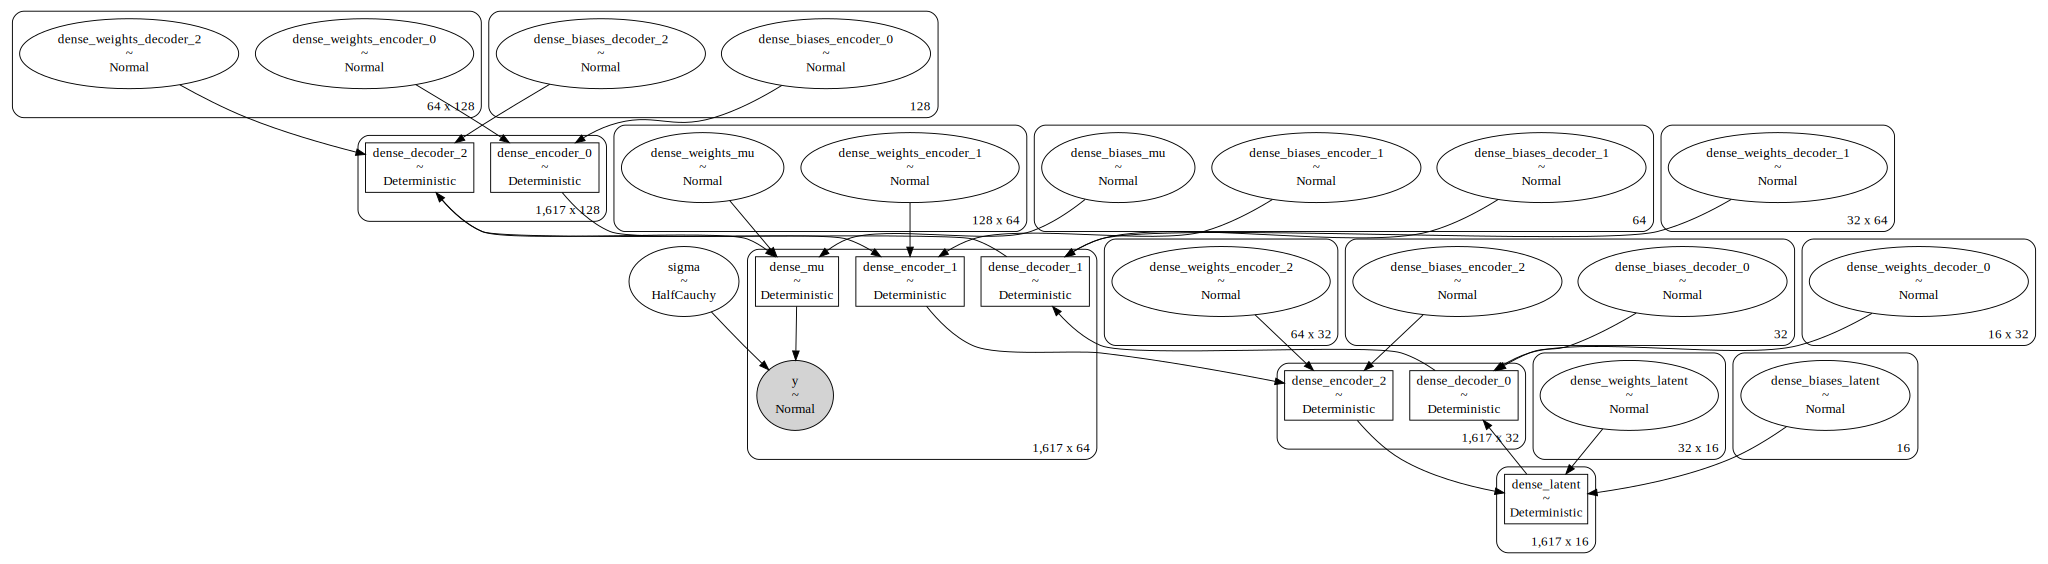

In [43]:
denoising_autoencoder = BayesianAutoencoder(
    X=X_tr,  
    likelyhood_model='gaussian_lk',
    layers=(128, 64, 32), 
    latent_size=16,
    activation='tanh',
    prior=pm.Normal,
    mu=0,
    sigma=1,
    batch_size=150,
    advi_approx=True,
    noise_sigma=0.1
)
denoising_autoencoder.show_graph()

In [53]:
denoising_autoencoder.fit()
den_aut_traces = denoising_autoencoder.predict(
    X_ts, 
    X_ts,
    ['dense_latent'],
    samples=100
)

Finished [100%]: Average Loss = 2.2767e+05
C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\umap\umap_.py:905: RuntimeWarning: overflow encountered in true_divide
  result[n_samples > 0] = float(n_epochs) / n_samples[n_samples > 0]


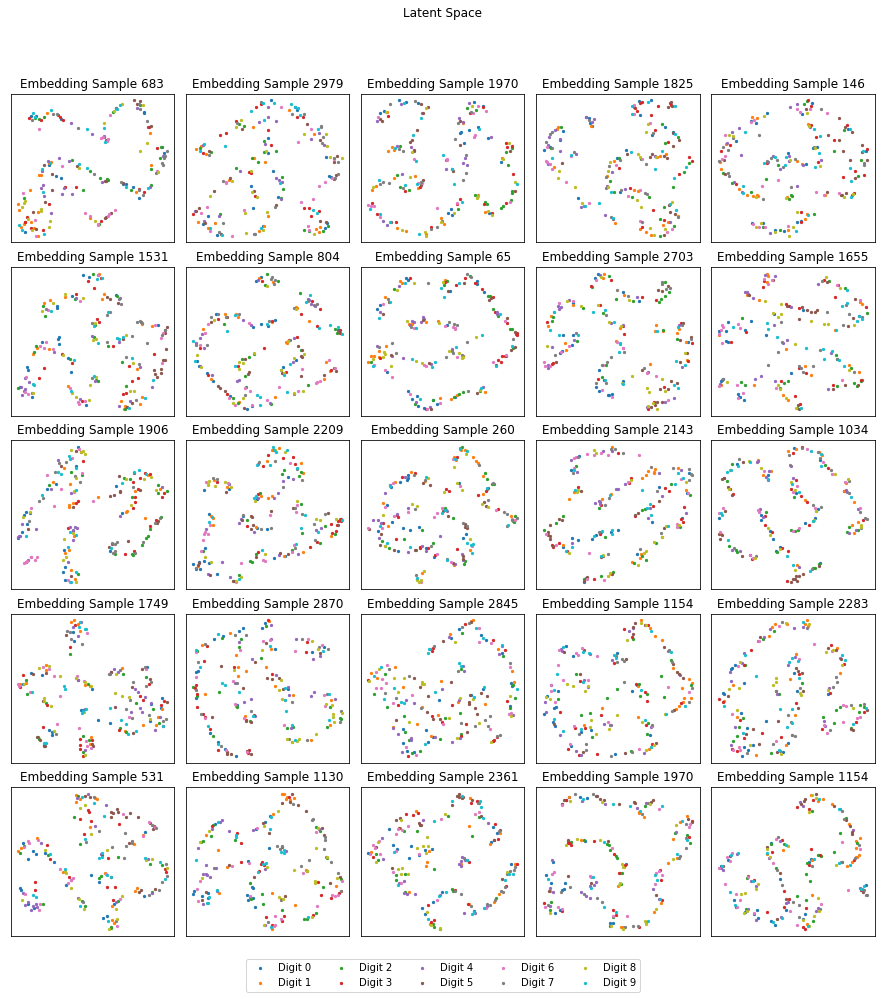

In [9]:
sampled_emb = np.random.choice(
    [sample for sample in range(3000)],
    25
)

visualize_embedding(
    embedding=den_aut_traces['dense_latent'],
    y=y_ts,
    metric='cosine',
    n_epochs=2000,
    random_state=666,
    sampled_emb=sampled_emb,
    title=f'Latent Space'
)